<img style="float: right;" src="http://www2.le.ac.uk/liscb1.jpg">  
# Leicester Institute of Structural and Chemical Biology: Python for Biochemists
# Student's *t*-tests

This section just shows how to run a *t*-test on some data.  If you really want to *understand* what's going on, look at the "how and why" section lower down.

In [1]:
# We'll do the imports for this section, just in case
from statistics import mean, stdev
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## One sample
### Assumptions
* The data are Normally distributed.
* The data are independent and identically distributed (i.i.d)
* You know the population mean *a priori*: **before** you collect the data

In [2]:
a_priori_population_mean = 30
data = [30.02, 29.99, 30.11, 29.97, 30.01, 29.99]

In [3]:
shapiro = stats.shapiro(data)

n_string = 'NOT ' if shapiro.pvalue < 0.05 else ''
print(f'The Shapiro-Wilk test for normality gives a p-value of:{shapiro.pvalue/2:0.3f}.')
print(f'Suggesting that the data ARE {n_string}Normally distributed.')

The Shapiro-Wilk test for normality gives a p-value of:0.038.
Suggesting that the data ARE Normally distributed.


In [4]:
t_test = stats.ttest_1samp(data, a_priori_population_mean)

print('The one-sample t-test, comparing a dataset to a known value, ', end='')
print(f'has a test statistic of {t_test.statistic:0.3f},')
print(f'and a p-value of {t_test.pvalue:0.3f} (or {t_test.pvalue/2:0.3f} for a one-tailed test)')

The one-sample t-test, comparing a dataset to a known value, has a test statistic of 0.739,
and a p-value of 0.493 (or 0.246 for a one-tailed test)


## Two samples
### Assumptions
* The data from both populations are Normally distributed.
* The data from each population are independent and identically distributed (i.i.d).

#### From data 

In [5]:
# Given two datasets
A1 = [30.02, 29.99, 30.11, 29.97, 30.01, 29.99]
A2 = [29.89, 29.93, 29.72, 29.98, 30.02, 29.98]

In [6]:
shapiro = stats.shapiro(A1)
n_string = 'NOT ' if shapiro.pvalue < 0.05 else ''
print(f'The Shapiro-Wilk test for normality gives a p-value of:{shapiro.pvalue/2:0.3f} for A1.')
print(f'Suggesting that A2 IS {n_string}Normally distributed.')
print()

shapiro = stats.shapiro(A2)
n_string = 'NOT ' if shapiro.pvalue < 0.05 else ''
print(f'The Shapiro-Wilk test for normality gives a p-value of:{shapiro.pvalue/2:0.3f} for A2.')
print(f'Suggesting that A2 IS {n_string}Normally distributed.')

The Shapiro-Wilk test for normality gives a p-value of:0.038 for A1.
Suggesting that A2 IS Normally distributed.

The Shapiro-Wilk test for normality gives a p-value of:0.080 for A2.
Suggesting that A2 IS Normally distributed.


In [7]:
bartlett = stats.bartlett(A1, A2)

b_string = 'NOT ' if bartlett.pvalue < 0.05 else ''
print(f'The Bartlett test for equal variances in Normally distributed data gives a p-value of:{bartlett.pvalue/2:0.3f}.')
print(f'Suggesting that the variances ARE {b_string}similar.')

The Bartlett test for equal variances in Normally distributed data gives a p-value of:0.057.
Suggesting that the variances ARE similar.


In [8]:
levene = stats.levene(A1, A2)

l_string = 'NOT ' if levene.pvalue < 0.05 else ''
print(f'The Levene test for equal variances in non-normal data gives a p-value of:{levene.pvalue/2:0.3f}.')
print(f'Suggesting that the data ARE {l_string}Normally distributed.')

The Levene test for equal variances in non-normal data gives a p-value of:0.143.
Suggesting that the data ARE Normally distributed.


In [9]:
t_test = stats.ttest_ind(A1, A2)

print('The 2-sided t-test, assuming equal variance for both datasets, ', end='')
print(f'has a test statistic of {t_test.statistic:0.3f},')
print(f'and a p-value of {t_test.pvalue:0.3f} (or {t_test.pvalue/2:0.3f} for a one-tailed test)')

The 2-sided t-test, assuming equal variance for both datasets, has a test statistic of 1.959,
and a p-value of 0.079 (or 0.039 for a one-tailed test)


In [10]:
welchs_t_test = stats.ttest_ind(A1, A2, equal_var=False)

print('The 2-sided t-test, assuming unequal variance between the datasets, ', end='')
print(f'has a test statistic of {welchs_t_test.statistic:0.3f},')
print(f'and a p-value of {welchs_t_test.pvalue:0.3f} (or {welchs_t_test.pvalue/2:0.3f} for a one-tailed test)')

The 2-sided t-test, assuming unequal variance between the datasets, has a test statistic of 1.959,
and a p-value of 0.091 (or 0.045 for a one-tailed test)


#### From summary statistics 

In [11]:
A1_mean = mean(A1)
A1_stdev = stdev(A1)
A1_obs_count = len(A1)
A2_mean = mean(A2)
A2_stdev = stdev(A2)
A2_obs_count = len(A2)

t_test_summary = stats.ttest_ind_from_stats(mean1=A1_mean, std1=A1_stdev, nobs1=A1_obs_count,
                                            mean2=A2_mean, std2=A2_stdev, nobs2=A2_obs_count,
                                            equal_var=True
                                           )

print('The 2-sided t-test based on summary statistics and assuming equal variance for both datasets, ', end='')
print(f'has a test statistic of {t_test_summary.statistic:0.3f},')
print(f'and a p-value of {t_test_summary.pvalue:0.3f} (or {t_test_summary.pvalue/2:0.3f} for a one-tailed test)')

The 2-sided t-test based on summary statistics and assuming equal variance for both datasets, has a test statistic of 1.959,
and a p-value of 0.079 (or 0.039 for a one-tailed test)


## Two Matched Pairs

In [12]:
# Given two matched datasets (test scores for 4 students from two exams, modified from Wikipedia)
exam_1 = [55, 40, 80, 68]
exam_2= [67, 46, 98, 91]

In [13]:
related_t_test = stats.ttest_rel(exam_1, exam_2)

print('The 2-sided t-test for these two datasets, treated as pair-wise related, ', end='')
print(f'has a test statistic of {related_t_test.statistic:0.3f},')
print(f'and a p-value of {related_t_test.pvalue:0.3f} (or {related_t_test.pvalue/2:0.3f} for a one-tailed test)')

The 2-sided t-test for these two datasets, treated as pair-wise related, has a test statistic of -4.005,
and a p-value of 0.028 (or 0.014 for a one-tailed test)


In [14]:
related_t_test_ind = stats.ttest_ind(exam_1, exam_2)

print('The 2-sided t-test for these two datasets, treated as independent, ', end='')
print(f'has a test statistic of {related_t_test_ind.statistic:0.3f},')
print(f'and a p-value of {related_t_test_ind.pvalue:0.3f} (or {related_t_test_ind.pvalue/2:0.3f} for a one-tailed test)')

The 2-sided t-test for these two datasets, treated as independent, has a test statistic of -1.007,
and a p-value of 0.353 (or 0.176 for a one-tailed test)


## Be a Scientist, not a data entry clerk!

Remember the requirements for *t*-tests to be "valid" (in this case, the 2-sample *t*-test):

* The data from both populations are Normally distributed.
* The data from each population are independent and identically distributed (i.i.d).

With these rules in mind, lets take a look at a rather famous dataset:

In [15]:
anscombe_I = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
anscombe_II = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
anscombe_III = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
anscombe_IV = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

Now we can do the pair-wise *t*-test on these to see if they're different: 

In [16]:
print(f"Two-sample t-test on Anscombs's dataset I vs II: p = {stats.ttest_ind(anscombe_I, anscombe_II).pvalue:0.4f}")
print(f"Two-sample t-test on Anscombs's dataset I vs III: p = {stats.ttest_ind(anscombe_I, anscombe_III).pvalue:0.4f}")
print(f"Two-sample t-test on Anscombs's dataset I vs IV: p = {stats.ttest_ind(anscombe_I, anscombe_IV).pvalue:0.4f}")
print(f"Two-sample t-test on Anscombs's dataset II vs III: p = {stats.ttest_ind(anscombe_II, anscombe_III).pvalue:0.4f}")
print(f"Two-sample t-test on Anscombs's dataset II vs IV: p = {stats.ttest_ind(anscombe_II, anscombe_IV).pvalue:0.4f}")
print(f"Two-sample t-test on Anscombs's dataset III vs IV: p = {stats.ttest_ind(anscombe_III, anscombe_IV).pvalue:0.4f}")

Two-sample t-test on Anscombs's dataset I vs II: p = 1.0000
Two-sample t-test on Anscombs's dataset I vs III: p = 0.9992
Two-sample t-test on Anscombs's dataset I vs IV: p = 1.0000
Two-sample t-test on Anscombs's dataset II vs III: p = 0.9992
Two-sample t-test on Anscombs's dataset II vs IV: p = 1.0000
Two-sample t-test on Anscombs's dataset III vs IV: p = 0.9992


... and we conclude that they're all the same (in fact, weirdly the same!)  

But maybe we'll investigate further.  Let's check to see if they have the same variances:

In [17]:
print(f"Levene test on Anscombs's dataset I vs II: {stats.levene(anscombe_I, anscombe_II).pvalue:0.4f}")
print(f"Levene test on Anscombs's dataset I vs III: {stats.levene(anscombe_I, anscombe_III).pvalue:0.4f}")
print(f"Levene test on Anscombs's dataset I vs VI: {stats.levene(anscombe_I,anscombe_IV).pvalue:0.4f}")
print(f"Levene test on Anscombs's dataset II vs III: {stats.levene(anscombe_II, anscombe_III).pvalue:0.4f}")
print(f"Levene test on Anscombs's dataset II vs VI: {stats.levene(anscombe_II,anscombe_IV).pvalue:0.4f}")
print(f"Levene test on Anscombs's dataset III vs VI: {stats.levene(anscombe_III,anscombe_IV).pvalue:0.4f}")

Levene test on Anscombs's dataset I vs II: 0.8409
Levene test on Anscombs's dataset I vs III: 0.7138
Levene test on Anscombs's dataset I vs VI: 0.7998
Levene test on Anscombs's dataset II vs III: 0.8797
Levene test on Anscombs's dataset II vs VI: 0.9643
Levene test on Anscombs's dataset III vs VI: 0.9133


... and we conclude that their variances are all the same (in fact, weirdly the same!)  

But maybe we'll investigate further.  Let's check to see if they're all normally distributed:

In [18]:
print(f"Shapiro test on Anscombs's dataset I: {stats.shapiro(anscombe_I).pvalue:0.4f}")
print(f"Shapiro test on Anscombs's dataset II: {stats.shapiro(anscombe_II).pvalue:0.4f}")
print(f"Shapiro test on Anscombs's dataset III: {stats.shapiro(anscombe_III).pvalue:0.4f}")
print(f"Shapiro test on Anscombs's dataset IV: {stats.shapiro(anscombe_IV).pvalue:0.4f}")

Shapiro test on Anscombs's dataset I: 0.9467
Shapiro test on Anscombs's dataset II: 0.0222
Shapiro test on Anscombs's dataset III: 0.0260
Shapiro test on Anscombs's dataset IV: 0.0908


... Ok, so we finally found a difference!  Using a cutoff of $p<0.05$, Datasets II and III are not Normally distributed.  But I and IV are - so we conclude that I and IV are statistically identical and II and III we don't know what to do with.  

But maybe we'll investigate further.  Lets plot histograms of Anscombe's datasets...

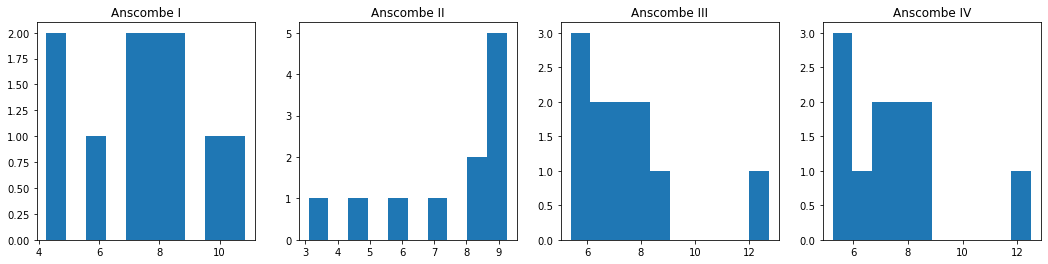

In [19]:
fig = plt.figure(figsize=(18,4))
plts = fig.subplots(ncols=4)
plts[0].hist(anscombe_I)
plts[0].set_title('Anscombe I')
plts[1].hist(anscombe_II)
plts[1].set_title('Anscombe II')
plts[2].hist(anscombe_III)
plts[2].set_title('Anscombe III')
plts[3].hist(anscombe_IV)
plts[3].set_title('Anscombe IV');

We can also make *Violin Plots* using the higher-level library `seaborn`, which really likes to get data from `pandas`.

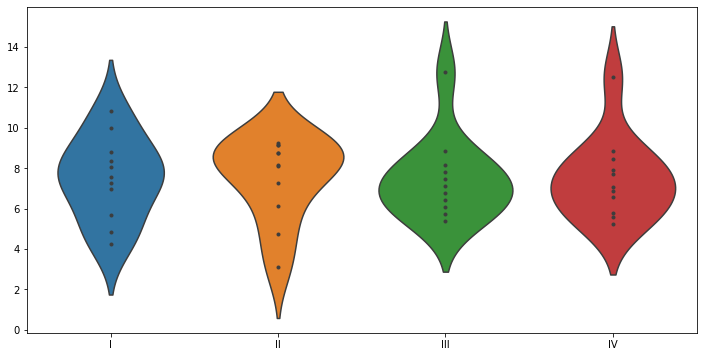

In [20]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots(figsize = (12, 6))
df = pd.DataFrame(np.array([anscombe_I, anscombe_II, anscombe_III, anscombe_IV]).T,
                  columns = ['I', 'II', 'III', 'IV'])
ax = sns.violinplot(data=df, inner='point', ax=ax);

Oh, right,... um... They don't really look similar at all (except maybe III and IV?).  Also - IV doesn't look  Normally distributed.  

Anscomb's datasets actually come with both X and Y values (we've only been using the Y so-far.)  Let's make scatter plots to see if that tells us anything more:

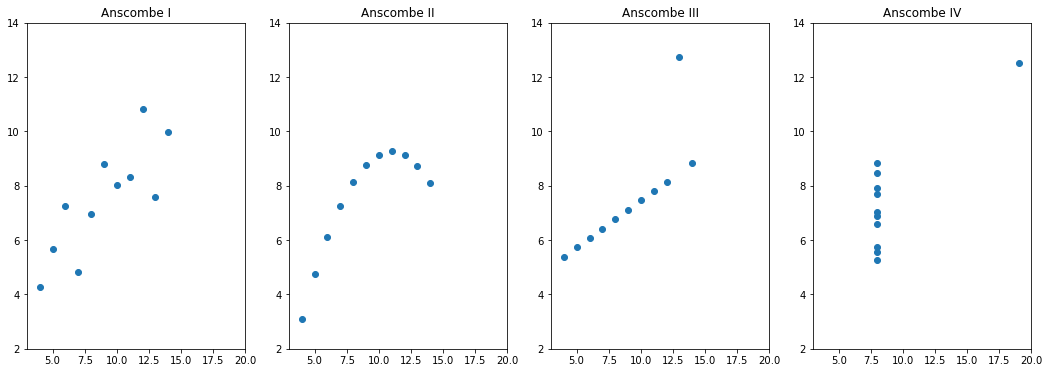

In [21]:
anscombe_x = [10, 8, 13,9,11,14,6,4,12,7,5]
anscombe_IV_x = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]

fig = plt.figure(figsize=(18,6))
plts = fig.subplots(ncols=4)
plts[0].scatter(anscombe_x, anscombe_I)
plts[0].set_title('Anscombe I')
plts[1].scatter(anscombe_x, anscombe_II)
plts[1].set_title('Anscombe II')
plts[2].scatter(anscombe_x, anscombe_III)
plts[2].set_title('Anscombe III')
plts[3].scatter(anscombe_IV_x, anscombe_IV)
plts[3].set_title('Anscombe IV')

for p in plts:
    p.set_xlim(3,20)
    p.set_ylim(2,14)

**Oops.**  Maybe should have *started* with plotting the data.

## The how and the why
This section is a bit dense, but if you want to know how and why a *t*-test works (and get a good feeling for what it really means,) it's worth it to spend some time understanding what the code here does.  Hopefully you'll find it enlightening.  

The family of *t*-tests all compare some test statistic to Student's *t*-distribution.  In order to understand why this is useful, we can build a simple example (the one-sample *t*-test.)  The first step is to formulate the appropriate question. 
> If I draw a few samples from a Normal distribution with a *true* mean of 0 and a *true* standard deviation of 1 (which we will call our ***null hypothesis***), how far from 0 will the mean of my samples be?  

With this question in hand, we'll do 10 draws several thousand times to find out what happens (note the function below returns both mean and standard deviation - we'll come back to the standard deviation later):

In [22]:
# We'll do the imports for this section now
from math import sqrt
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
draws = 10

def small_sample_mean_and_stdev(n, mu=0, stdev=1, dof=None):
    if dof is None:
        dof = n-1
    elif (dof >= n) or (dof < 1):
        raise ValueError('dof must be between 1 and n-1.')
        
    null_hypothesis = stats.norm(loc=mu, scale=stdev)  # Specify the parameters of our Gaussian distribution
    draws = null_hypothesis.rvs(dof+1)                 # Draw dof+1 random variables from our chosen
    while len(draws) < n:                              # Repeat values until n is reached,
        draws += draws
    draws = draws[:n]                                  # then truncate to get n draws with dof degrees of freedom
    mean = draws.mean()
    stdev =  sqrt(sum((draws - mean)**2) / (dof))
    return mean, stdev

h0_simulations = []
for _ in range(10000):
    h0_simulations.append(small_sample_mean_and_stdev(draws))

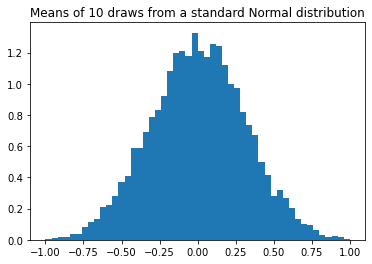

In [24]:
means = [mv[0] for mv in h0_simulations]
plt.hist(means, bins=50, density=True, range=(-1, 1))
plt.title(f'Means of {draws} draws from a standard Normal distribution');

You may notice that this distribution looks like a Gaussian distribution - which in fact it would be with an infinite number of simulations.  Let's now ask this question:
> If I draw 10 samples from a standard Normal distribution, how often will I get a value more than 0.625?  

With our simulated data in hand, the calculation becomes straight-forward:

In [25]:
my_average = 0.625

values_more_than_my_average = 0
for mean, _ in h0_simulations:
    if mean > my_average:
        values_more_than_my_average += 1

print(f'{draws} draws from a standard Normal will give me an average greater than {my_average} ', end='')
print(f'{((values_more_than_my_average/len(h0_simulations) )*100):0.2f}% of the time.')

10 draws from a standard Normal will give me an average greater than 0.625 2.28% of the time.


And this question:
> If I draw 10 samples from a standard Normal distribution, how often will I get a value more than 0.625 away from 0? 

... gives this code:

In [26]:
my_difference = 0.625

values_farther_from_zero_than_my_difference = 0
for mean, _ in h0_simulations:
    if mean < -my_difference:
        values_farther_from_zero_than_my_difference += 1    
    elif mean > my_difference:
        values_farther_from_zero_than_my_difference += 1

print(f'{draws} draws from a standard Normal will give me an average further away from zero of at least {my_difference} ', end='')
print(f'{((values_farther_from_zero_than_my_difference/len(h0_simulations) )*100):0.2f}% of the time.')

10 draws from a standard Normal will give me an average further away from zero of at least 0.625 4.38% of the time.


The first code block is a *one-tailed* question, and the second is a *two-tailed* question.  Notice how the question determines what code is written, and therefore what result you get.  So, **you must ask the question *before* you look at the data.**  

Does this mean that if you get a difference of 0.625, you can be 95.01% sure that it's from a different distribution?  
**NO!** 

This approach only gives information about how confident you can be about claiming 'sameness'.  To ask about differences, you would have to know much more information about the distributions of *both* groups.  

The problem with the method above is that it forces us to simulate lots of draws from a distribution with identical parameters to the one our samples get drawn from.  To generalize our simulations, we need to identify what controls the 'spread' in the simulation, and remove unwanted effects.  Three factors control this 'spread':

1. The number of independent samples we draw: the more independent samples, the wider the spread.
2. The total number of samples we draw: the more total samples, the more precise the simulation (and so the narrower the spread.)
3. The per-simulation standard deviation (related to 2. above,) compared to the total population standard deviation (related to 1. above)

Lets start by removing the precision dependence on the total number of samples (regardless of independence.)  This can be thought of as a 'signal-to-noise' effect, which will result in adjusting the spread by $1/\sqrt{n}$.  So we 're-spread' by multiplying by $\sqrt{n}$.

In [27]:
s_n_corrected_h0_simulations = []
for mean, stdev in h0_simulations:
    s_n_corrected_mean = mean * sqrt(draws)
    s_n_corrected_h0_simulations.append((s_n_corrected_mean, stdev))

Next, we remove the per-simulation standard deviation by dividing by the individual simulated mean standard deviation (notice that we're calling the result *t*-distribution):

In [28]:
t_distribution = []
for mean, stdev in s_n_corrected_h0_simulations:
    t_distribution_sample = mean / stdev
    t_distribution.append(t_distribution_sample)

Unfortunately, there's nothing we can do about the degrees-of-freedom.  If we want to do a calculation with a different number of degrees of freedom, we will have to do a new simulation (more on this later.)  

So now lets look at our simulation after correction (note the wider x-axis):

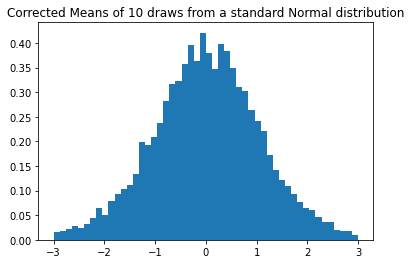

In [29]:
plt.hist(t_distribution, bins=50, density=True, range=(-3, 3))
plt.title(f'Corrected Means of {draws} draws from a standard Normal distribution');

So now we address a slightly more interesting variation of our first question:

> If I draw 10 samples from *any* Normal distribution, and get a value of more than 0.625, what is the chance the distribution was centered on 0?  

Unfortunately, you can't simply force a distribution to give you some value.  So we'll run our same simulation until we find some samples we can evaluate.

In [30]:
# First, we get 100 samples above our requested value:

samples_above_my_average = []

while len(samples_above_my_average) < 100:
    sample = small_sample_mean_and_stdev(10, stdev=1)
    if sample[0] > my_average:
        samples_above_my_average.append(sample)

In [31]:
# Now, for each sample, we do the calculation as above for the one-sided test:
values_for_samples = []
for sample in samples_above_my_average:
    s_n_adjusted_sample_mean = sample[0] * sqrt(draws)
    test_statistic = s_n_adjusted_sample_mean / sample[1]
    
    values_more_than_test_statistic = 0
    for mean in t_distribution:
        if mean > test_statistic:
            values_more_than_test_statistic += 1
    values_for_samples.append(values_more_than_test_statistic)

In [32]:
# Finally, we take the average of the counts and turn it into a percentage:
average_counts_above_adjusted_threshold = sum(values_for_samples) / len(values_for_samples)
frequency_above_adjusted_threshold = average_counts_above_adjusted_threshold / len(t_distribution)

print(f'{draws} draws from a Normal will give me an average greater than {my_average} ', end='')
print(f'{frequency_above_adjusted_threshold * 100 :0.2f}% of the time.')

10 draws from a Normal will give me an average greater than 0.625 2.70% of the time.


You may notice that we got *nearly* the same result as above.  By increasing the number of simulations that result in a sample mean above our requested value, we would approach the same number (and get to it exactly with an infinite number of simulations.)  If you like, you can play with the standard deviation parameter in our simulation to see what happens if we make the sample distribution narrower or wider.  

So, now we have a powerful tool to find out what the chance is that some data (with only a few observations,) came from our chosen *null hypothesis* (Normal distribution centered on 0 with a standard deviation of 1 and 10 independent samples.)  In fact, we can rephrase the question above to ask about distributions not centered on 0 by subtracting the 'query' center value from each observation.  We can also ask about differences between datasets by properly combining the standard deviations, and the degrees-of-freedom, of the two datasets.  If we decide to express the percent chance as a frequency (i.e. 0.025 rather than 2.5%,) we call this the *p-value*. 

Notice that we called the sample mean, after adjustment for n and sample standard deviation, the ***test statistic***.  Most of *t*-testing involves finding the proper way to do the conversion from means and standard deviations in our data to the *test statistic*.  

If we want to ask about data with a different number of degrees-of-freedom, we would need to re-simulate from a different *null hypothesis* distributon at the begining.  Moreover, to run a *t*-test with high precision, you should have an approximately infinite number of simulations in your theoretical distribution.  The alternative is to find an equation that will give you the exact *t-distibution* from any *null hypothesis*.  When *t*-testing was first described by William Sealy Gossett in 1908, that equation (at least for the Normal distribution) had already been derived.  Although it has had a few names, today, we call it Student's t-distribution.

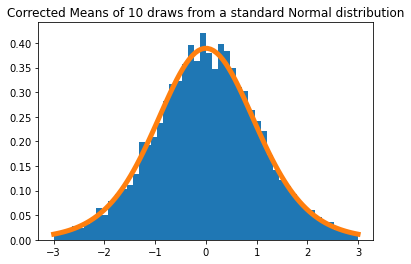

In [33]:
plt.hist(t_distribution, bins=50, density=True, range=(-3, 3))
plt.title(f'Corrected Means of {draws} draws from a standard Normal distribution');

x = np.linspace(-3, 3, 100)
t_distribution = stats.t(df=draws)

plt.plot(x, t_distribution.pdf(x), linewidth=5);  # pdf is the probability density function

So, in summary, the *t*-test:
1. Pick a distribution (by default, a Normal distribution,) and specify the degrees of freedom.  Call it the ***null hypothesis***.
2. Generalize the distribution to compare it to data points.  Call the generalized form the ***t-distribution***.
3. Summarize the data points to compare to the *t*-distibution.  Call this summary the ***test statistic***.
3. Use the *test statistic* to decide if we picked the correct *null hypothesis*.

So, when we use the *t*-test on some data, we're asking the following question:

> What is the chance that a specific Normal distribution would give me this data?

... and we usually accept that if $p < 0.05$, that means our data *didn't* come from the distribution we guessed at the begining.  You **must** always be careful about this approach, and constantly ask yourself:
* What if my data didn't come from any Normal distribution?
* What if my data have hidden and/or unaccounted for correlations that change my degrees-of-freedom?

One final point:  No-where above do we discuss an alternative hypothesis. So the best we can ever do using the *t*-test is to say something like "There's less than a 5% chance that I guessed the right *null hypothesis*, so I'll conclude I was wrong."

* If I have 10 results in my paper, each with $p = 0.05$, what are the chances one is wrong?  (Answer: $1-0.95^{10}= 43\%$ chance at least one is wrong.)
* If I have 10 results in my paper, each with $p = 0.01$, what are the chances one is wrong?  (Answer: 10% chance at least one is wrong.)
* If I have 10 results in my paper, each with $p = 0.001$, what are the chances one is wrong?  (Answer: 1% chance at least one is wrong.)  

* If I publish 1000 results during my career, each with $p = 0.001$, what are the chances one is wrong?  (Answer: 63% chance at least one is wrong.)
* If I publish 1000 results during my career, each with $p = 0.01$, what are the chances one is wrong?  (Answer: 99.996% chance at least one is wrong - but which one?)